**Importing the libraries:**

In [2]:
import numpy as np
import scipy.io
from matplotlib import pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential, Input, Model
from keras.layers.core import Dense, Dropout, Activation, Reshape, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


**Uploading the Street View House Number dataset:**

In [3]:
from google.colab import files

uploaded = files.upload()

Saving train_32x32.mat to train_32x32.mat


**Loading the dataset and viewing it:**

In [0]:
mat = scipy.io.loadmat('train_32x32.mat')

mat = mat['X']
b, h, d, n = mat.shape

In [5]:
mat

array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ...,

        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 191, 228, 189],
         [ 59,  66, 220, ..., 193, 223, 186]]],


       [[[ 28,  85,  21, ...,  92, 183, 204],
         [ 39,  77,  53, ...,  78, 182, 205],
         [ 35,  61, 110, ..., 103, 186, 202]],

    

**Converting all RGB images to greyscale and normalizing the images:**

In [0]:
# Convert all RGB - images to greyscale
img_gray = np.zeros(shape = (n, b, h, 1))

def rgb2gray(rgb):
  return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

for i in range(n):
  # Convert to greyscale
  img = rgb2gray(mat[:, :, :, i])
  img = img.reshape(1, 32, 32, 1)
  img_gray[i, :] = img
  
# Normalize input
img_gray = img_gray / 255.

**Building the autoencoder:**

In [7]:
img_size = Input(shape = (b, h, 1))

x = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(img_size)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(x)
encoded = MaxPooling2D((2, 2), padding = 'same')(x)

x = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = Model(img_size, decoded)

autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'rmsprop',
                    metrics = ['binary_accuracy'])

# Output summary of network
autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_

**Defining the callback function:**

**Defining the hyperparameters and training the model:**

In [0]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)]

In [11]:
n_epochs = 1000
batch_size = 128

autoencoder.fit(img_gray, img_gray,
                epochs = n_epochs,
                batch_size = batch_size,
                shuffle = True,
                validation_split = 0.2,
                callbacks = callbacks)

Train on 58605 samples, validate on 14652 samples
Epoch 1/1000
58605/58605 [==============================] - 9s 160us/step - loss: 0.6390 - binary_accuracy: 2.0456e-04 - val_loss: 0.6272 - val_binary_accuracy: 1.7276e-04
Epoch 2/1000
58605/58605 [==============================] - 7s 124us/step - loss: 0.6248 - binary_accuracy: 2.2127e-04 - val_loss: 0.6236 - val_binary_accuracy: 1.7302e-04
Epoch 3/1000
58605/58605 [==============================] - 7s 124us/step - loss: 0.6212 - binary_accuracy: 2.2147e-04 - val_loss: 0.6202 - val_binary_accuracy: 1.7302e-04
Epoch 4/1000
58605/58605 [==============================] - 7s 123us/step - loss: 0.6192 - binary_accuracy: 2.2176e-04 - val_loss: 0.6189 - val_binary_accuracy: 1.7316e-04
Epoch 5/1000
58605/58605 [==============================] - 7s 124us/step - loss: 0.6180 - binary_accuracy: 2.2226e-04 - val_loss: 0.6181 - val_binary_accuracy: 1.7309e-04
Epoch 6/1000
58605/58605 [==============================] - 7s 124us/step - loss: 0.6172 -

**Predicting, using the autoencoder:**

In [0]:
pred = autoencoder.predict(img_gray)

**Now, we can output some of the original images and corresponding decoded images:**

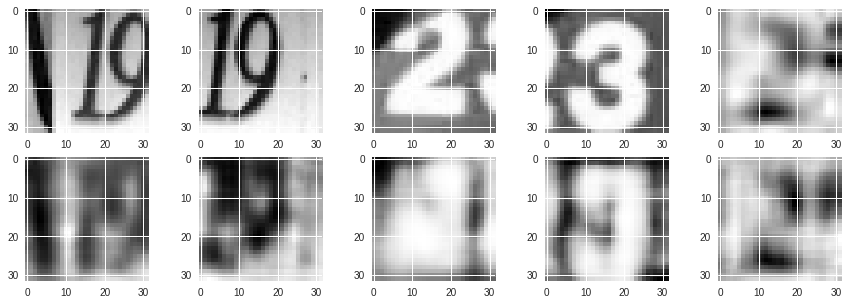

In [13]:
n = 5

plt.figure(figsize = (15, 5))
for i in range(n):
  rand = np.random.randint(len(img_gray))
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(img_gray[i].reshape(32, 32), cmap = 'gray')
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(pred[i].reshape(32, 32), cmap = 'gray')
plt.show()